In [1]:
import findspark
findspark.init()

from pyspark import SparkContext
sc = SparkContext()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ANLY502-Final-Project").getOrCreate()

In [58]:
from matplotlib import pyplot as plt

In [2]:
data_files = "s3://jk2060/final_project/"
reddit_df = spark.read.json(data_files)

In [3]:
reddit_df.cache()

DataFrame[archived: boolean, author: string, author_cakeday: boolean, author_created_utc: bigint, author_flair_background_color: string, author_flair_css_class: string, author_flair_richtext: array<struct<a:string,e:string,t:string,u:string>>, author_flair_template_id: string, author_flair_text: string, author_flair_text_color: string, author_flair_type: string, author_fullname: string, author_patreon_flair: boolean, body: string, can_gild: boolean, can_mod_post: boolean, collapsed: boolean, collapsed_reason: string, controversiality: bigint, created_utc: bigint, distinguished: string, edited: string, gilded: bigint, gildings: struct<gid_1:bigint,gid_2:bigint,gid_3:bigint>, id: string, is_submitter: boolean, link_id: string, no_follow: boolean, parent_id: string, permalink: string, quarantined: boolean, removal_reason: string, retrieved_on: bigint, score: bigint, send_replies: boolean, stickied: boolean, subreddit: string, subreddit_id: string, subreddit_name_prefixed: string, subreddi

In [4]:
# Define schema
reddit_df.printSchema()

root
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_created_utc: long (nullable = true)
 |-- author_flair_background_color: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_richtext: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- a: string (nullable = true)
 |    |    |-- e: string (nullable = true)
 |    |    |-- t: string (nullable = true)
 |    |    |-- u: string (nullable = true)
 |-- author_flair_template_id: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_flair_text_color: string (nullable = true)
 |-- author_flair_type: string (nullable = true)
 |-- author_fullname: string (nullable = true)
 |-- author_patreon_flair: boolean (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- can_mod_post: boolean (nullable = true)
 |-

In [5]:
reddit_df.show(3, False)

+--------+---------+--------------+------------------+-----------------------------+----------------------+---------------------+------------------------------------+-----------------+-----------------------+-----------------+---------------+--------------------+----------------------------------------------+--------+------------+---------+----------------+----------------+-----------+-------------+------+------+---------+-------+------------+---------+---------+----------+-------------------------------------------------------------------------------------+-----------+--------------+------------+-----+------------+--------+------------+------------+-----------------------+--------------+
|archived|author   |author_cakeday|author_created_utc|author_flair_background_color|author_flair_css_class|author_flair_richtext|author_flair_template_id            |author_flair_text|author_flair_text_color|author_flair_type|author_fullname|author_patreon_flair|body                                   

In [6]:
# Drop columns that are not important in the project.
columns_to_drop = ['author_cakeday', 
                   'author_created_utc',
                   'author_flair_background_color',
                   'author_flair_richtext',
                   'author_flair_template_id',
                   'author_flair_text_color',
                   'author_flair_type',
                   'author_fullname',
                   'author_patreon_flair',
                   'can_gild',
                   'can_mod_post',
                   'collapsed',
                   'collapsed_reason',
                   'gildings',
                   'is_submitter',
                   'no_follow',
                   'permalink',
                   'quarantined',
                   'removal_reason',
                   'send_replies',
                   'stickied',
                   'subreddit_name_prefixed',
                   'subreddit_type'
                  ]
reddit_df = reddit_df.drop(*columns_to_drop)


In [7]:
# Print updated schema
reddit_df.printSchema()

root
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [7]:
reddit_df.cache()

DataFrame[archived: boolean, author: string, author_flair_css_class: string, author_flair_text: string, body: string, controversiality: bigint, created_utc: bigint, distinguished: string, edited: string, gilded: bigint, id: string, link_id: string, parent_id: string, retrieved_on: bigint, score: bigint, subreddit: string, subreddit_id: string]

In [ ]:
reddit_df.count()

In [8]:
# Remove deleted comments
reddit_df = reddit_df.filter(( reddit_df.body != '[deleted]'))

In [32]:
reddit_df.count()

29273619

In [33]:
reddit_df.createOrReplaceTempView("reddit_df_tbl")

In [99]:
# Average score / Average controversiality / Average gilded.
spark.sql("SELECT AVG(score) FROM reddit_df_tbl").show()
spark.sql("SELECT AVG(controversiality) FROM reddit_df_tbl").show()
spark.sql("SELECT AVG(gilded) FROM reddit_df_tbl").show()



+-----------------+
|       avg(score)|
+-----------------+
|8.494859859998861|
+-----------------+

+---------------------+
|avg(controversiality)|
+---------------------+
|  0.01936098164015867|
+---------------------+

+--------------------+
|         avg(gilded)|
+--------------------+
|3.420485864764449E-4|
+--------------------+



In [100]:
# Maximum score / Maximum gilded.
spark.sql("SELECT MAX(score) FROM reddit_df_tbl").show()
spark.sql("SELECT MAX(gilded) FROM reddit_df_tbl").show()

+----------+
|max(score)|
+----------+
|     53571|
+----------+

+-----------+
|max(gilded)|
+-----------+
|         34|
+-----------+



In [101]:
# Minimum score / Minimum gilded.
spark.sql("SELECT MIN(score) FROM reddit_df_tbl").show()

+----------+
|min(score)|
+----------+
|     -2252|
+----------+

+-----------+
|min(gilded)|
+-----------+
|          0|
+-----------+



In [42]:
# Top 10 Controversial Subreddits.
spark.sql("SELECT SUM(controversiality), subreddit FROM reddit_df_tbl GROUP BY subreddit ORDER BY SUM(controversiality) DESC LIMIT 10").show()

+---------------------+-------------+
|sum(controversiality)|    subreddit|
+---------------------+-------------+
|                21490|     politics|
|                13116|    AskReddit|
|                12517|          nba|
|                11200|    worldnews|
|                11075|         news|
|                 8463|       soccer|
|                 8196|         pics|
|                 7946|        funny|
|                 6769|AnthemTheGame|
|                 6632|   ukpolitics|
+---------------------+-------------+



In [46]:
top10_controversal = spark.sql("SELECT SUM(controversiality) \
                                as total_controversiality, \
                               subreddit FROM reddit_df_tbl \
                               GROUP BY subreddit \
                               ORDER BY total_controversiality \
                               DESC LIMIT 10")

In [47]:
top10_controversal_pd = top10_controversal.toPandas()

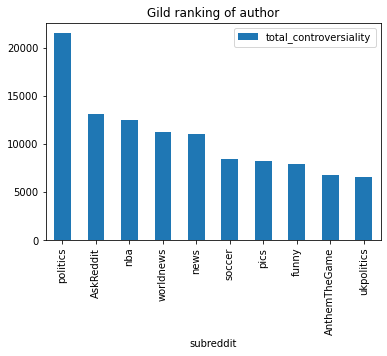

In [57]:
top10_controversal_pd.plot(kind='bar',x='subreddit',y='total_controversiality', title ="Gild ranking of author")

In [91]:
# Top 10 most scored subreddits. 
spark.sql("SELECT SUM(score) \
            as total_score, \
            subreddit FROM reddit_df_tbl \
            GROUP BY subreddit \
            ORDER BY total_score \
            DESC LIMIT 10").show()

+-----------+-------------+
|total_score|    subreddit|
+-----------+-------------+
|   33846493|    AskReddit|
|    5044640|     politics|
|    3986616|          nba|
|    3013354|       soccer|
|    2995804|todayilearned|
|    2631626|        funny|
|    2542158|       gaming|
|    2507304|         news|
|    2333532|          aww|
|    2287679|         pics|
+-----------+-------------+



In [64]:
top10_score = spark.sql("SELECT SUM(score) \
                        as total_score, \
                        subreddit FROM reddit_df_tbl \
                        GROUP BY subreddit \
                        ORDER BY total_score \
                        DESC LIMIT 10")

In [65]:
top10_score_pd = top10_score.toPandas()

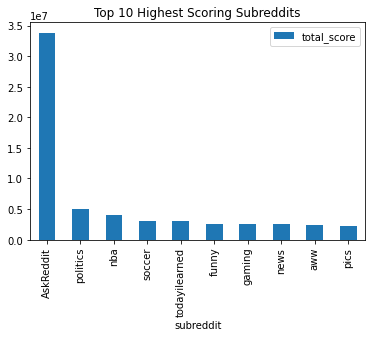

In [74]:
top10_score_pd.plot(kind='bar', 
                    x='subreddit',
                    y='total_score', 
                    title ="Top 10 Highest Scoring Subreddits")

In [79]:
# Top 10 least scored subreddits
spark.sql("SELECT SUM(score), subreddit \
          FROM reddit_df_tbl \
          GROUP BY subreddit \
          ORDER BY SUM(score) \
          ASC LIMIT 10").show()

+----------+--------------------+
|sum(score)|           subreddit|
+----------+--------------------+
|      -392|       KarmaRoulette|
|       -79| controllablewebcams|
|       -21|      adoseofbuckley|
|       -18|           EmmaStone|
|       -18|     MirandaCosgrove|
|       -15|      AnnaTsaralunga|
|       -13|TelegramStickersS...|
|       -11|   LapDanceSexStance|
|       -10|         cassiebrown|
|       -10|            katerina|
+----------+--------------------+



In [75]:
lowest10_score = spark.sql("SELECT SUM(score) \
                        as total_score, \
                        subreddit FROM reddit_df_tbl \
                        GROUP BY subreddit \
                        ORDER BY total_score \
                        ASC LIMIT 10")

In [77]:
lowest10_score_pd = lowest10_score.toPandas()

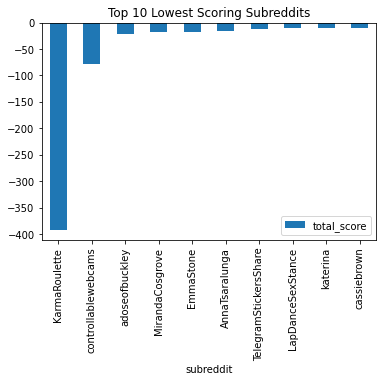

In [78]:
lowest10_score_pd.plot(kind='bar', 
                       x='subreddit',
                       y='total_score', 
                       title ="Top 10 Lowest Scoring Subreddits")

In [15]:
# Count the number of comments that received Reddit gold.
spark.sql("SELECT COUNT(id) FROM reddit_df_tbl WHERE gilded > 0").show()

+---------+
|count(id)|
+---------+
|     9097|
+---------+



In [16]:
# Count the number of positive comments.
spark.sql("SELECT COUNT(id) FROM reddit_df_tbl WHERE score > 0").show()

+---------+
|count(id)|
+---------+
| 27230651|
+---------+



In [25]:
# Count the number of negative comments.
spark.sql("SELECT COUNT(id) FROM reddit_df_tbl WHERE score < 0").show()

+---------+
|count(id)|
+---------+
|  1063939|
+---------+



In [32]:
# Top 10 comments with least score
spark.sql("SELECT author, score, body FROM reddit_df_tbl ORDER BY score ASC LIMIT 10").show(truncate=False)

+------------------+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|author            |score|body                                                                                                                                                                                                                                                                                                                                       

In [33]:
sc.stop()